In [47]:
# Import necessary libraries
import numpy as np
import tensorflow as tf
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [48]:
# Load the California housing dataset
california_housing = fetch_california_housing()

In [49]:
# Extract features (X) and target variable (y)
X, y = california_housing.data, california_housing.target

In [50]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [51]:
#Define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [52]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Epoch 1/50
413/413 [==============================] - 1s 1ms/step - loss: 1.1543 - val_loss: 0.5148
Epoch 2/50
413/413 [==============================] - 1s 2ms/step - loss: 0.4333 - val_loss: 0.4333
Epoch 3/50
413/413 [==============================] - 1s 2ms/step - loss: 0.3831 - val_loss: 0.4140
Epoch 4/50
413/413 [==============================] - 1s 2ms/step - loss: 0.3763 - val_loss: 0.4045
Epoch 5/50
413/413 [==============================] - 0s 1ms/step - loss: 0.3612 - val_loss: 0.3791
Epoch 6/50
413/413 [==============================] - 0s 1ms/step - loss: 0.3412 - val_loss: 0.3810
Epoch 7/50
413/413 [==============================] - 0s 1ms/step - loss: 0.3316 - val_loss: 0.3563
Epoch 8/50
413/413 [==============================] - 1s 1ms/step - loss: 0.3246 - val_loss: 0.3571
Epoch 9/50
413/413 [==============================] - 0s 1ms/step - loss: 0.3177 - val_loss: 0.3446
Epoch 10/50
413/413 [==============================] - 0s 1ms/step - loss: 0.3365 - val_loss: 0.3471

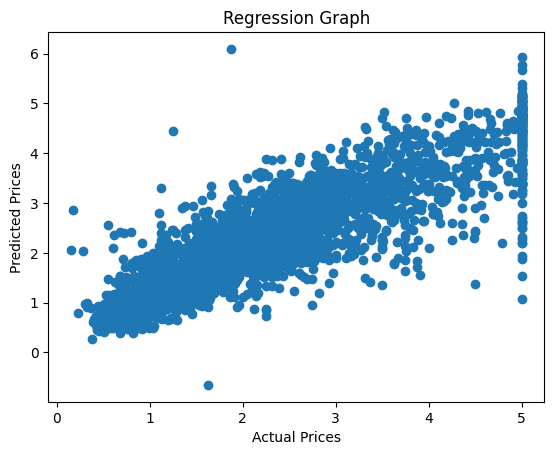

In [53]:
# Plot the regression graph
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Regression Graph")
plt.show()